In [35]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from tqdm.auto import tqdm

%matplotlib inline

In [36]:
def plot_P(func):
    plt.figure(figsize=(14, 5))
    plt.title(f"Population data for {func}")
    plt.plot(P[1], label = "Best")
    plt.plot(P[2], label = "Worst")
    plt.plot(P[3], label = "Mean")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.title(f"Best values for {func}")
    plt.hist(P[1], bins = 20)
    plt.show()
    
    '''plt.figure()
    plt.title(f"Mean values for {func}")
    plt.hist(P[3], bins = 20)
    plt.show()
    
    plt.figure()
    plt.title(f"Worst values for {func}")
    plt.hist(P[2], bins = 20)
    plt.show()''' 

In [37]:
def  initial_probability_vector():
    p = np.array([0.5 for _ in np.arange(0, d)])
    return p

In [38]:
def binary_random(p):
    return int(np.random.rand() < p)

In [39]:
def random_individual(p):
    x = np.array([binary_random(p[i]) for i in np.arange(d)])
    return x

In [40]:
def random_population(p, N):
    P = np.array([random_individual(p) for _ in np.arange(N)])
    return P

In [41]:
def one_max(P):
    return np.sum(P, 1)

In [42]:
def dec_one_max(P):
    pop_size = len(P)
    res = np.zeros(pop_size)
    for i in range(pop_size):
        if np.count_nonzero(P[i]) > 0:
            res[i] = np.sum(P[i])
        else:
            res[i] = d + 1
    return res

In [43]:
def five_dec_one_max(P):
    pop_size = len(P)
    res = np.zeros(pop_size)
    for i in range(pop_size):
        for segment in range(1, int(d/5) + 1):
            if np.count_nonzero(P[i][segment*5 - 5:segment*5]) > 0:
                res[i] += np.sum(P[i][segment*5 - 5:segment*5])
            else:
                res[i] += 6
    return res

In [44]:
def best_individuals(P, fun):
    evaluated = fun(P)
    return np.where(evaluated == np.amax(evaluated))[0][0], np.mean(evaluated), np.min(evaluated)

In [45]:
def PBIL(T, N, q1, q2, q3, fun):
    p = initial_probability_vector()
    P = random_population(p, N)
    solutions = [[] for _ in range(T)]
    best = np.zeros(T)
    worst = np.zeros(T)
    mean = np.zeros(T)
    for i in range(T):
        res = best_individuals(P, fun)
        best_ind = P[res[0]]
        solutions[i] = best_ind
        best[i] = fun([best_ind])
        mean[i] = res[1]
        worst[i] = res[2]
        for k in range(d):
            p[k] = p[k] * (1-q1) + q1 * best_ind[k]
        for k in range(d):
            if np.random.rand() < q2:
                p[k] = p[k] * (1 - q3) + binary_random(0.5) * q3
        P = random_population(p, N)
    return solutions[best_individuals(solutions, fun)[0]], best, worst, mean

### d = 50, N = 100, theta1 = 0.1, theta2 = 0.1, theta3 = 0.2

d = 50, N = 100, theta1 = 0.1, theta2 = 0.1, theta3 = 0.1
[50]


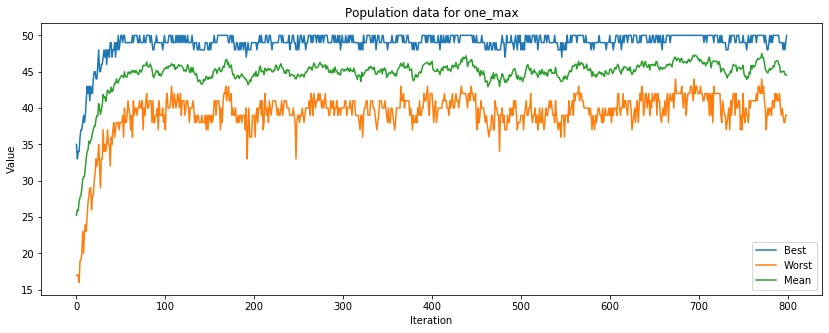

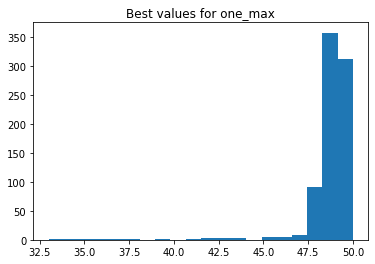

[50.]


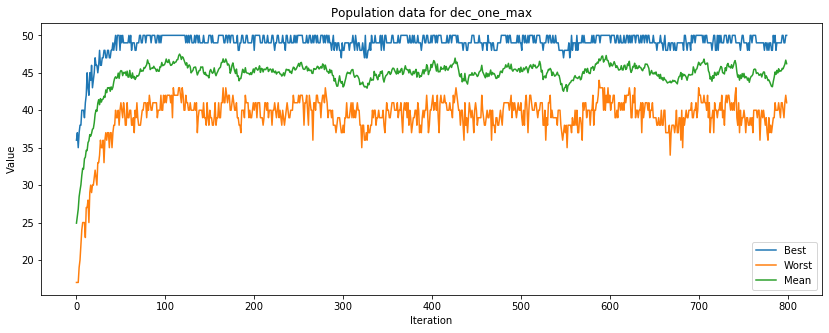

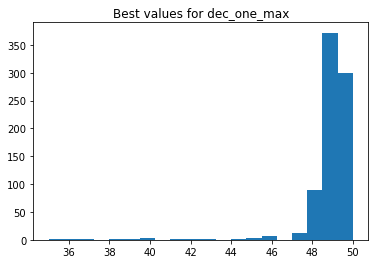

[52.]


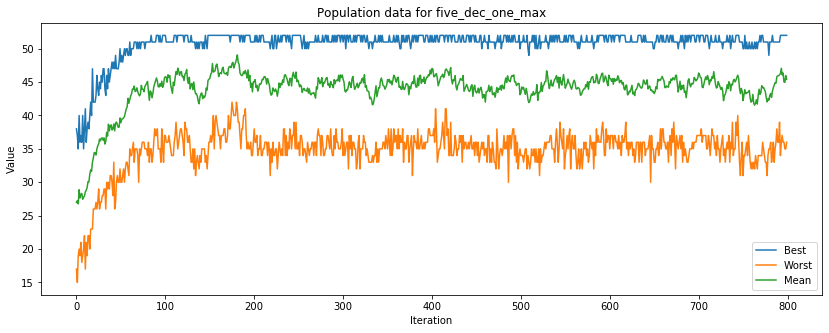

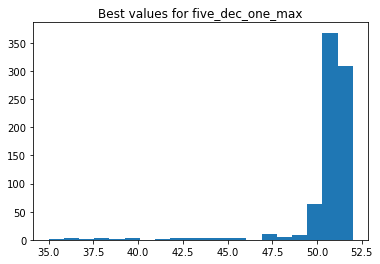

In [46]:
print("d = 50, N = 100, theta1 = 0.1, theta2 = 0.1, theta3 = 0.1")
d = 50

P = PBIL(800, 100, 0.1, 0.1, 0.2, one_max)
print(one_max([P[0]]))
plot_P("one_max")

P = PBIL(800, 100, 0.1, 0.1, 0.2, dec_one_max)
print(dec_one_max([P[0]]))
plot_P("dec_one_max")

P = PBIL(800, 100, 0.1, 0.1, 0.2, five_dec_one_max)
print(five_dec_one_max([P[0]]))
plot_P("five_dec_one_max")

### d = 20, N = 50, theta1 = 0.1, theta2 = 0.05, theta3 = 0.08

d = 20, N = 50, theta1 = 0.1, theta2 = 0.05, theta3 = 0.08
[20]


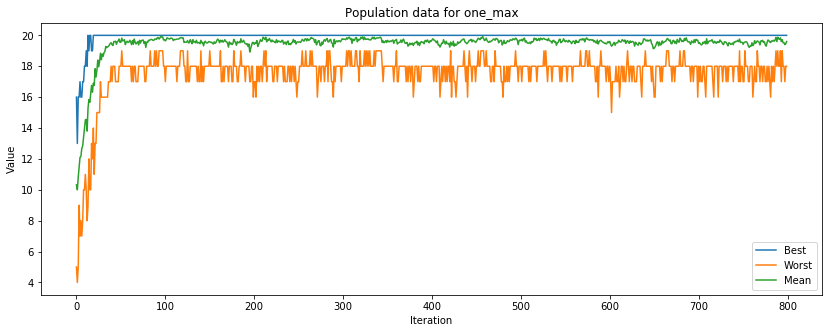

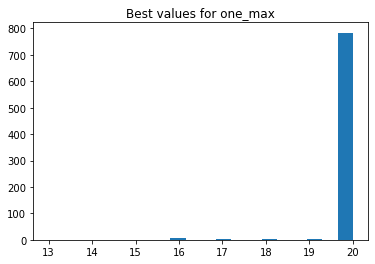

[20.]


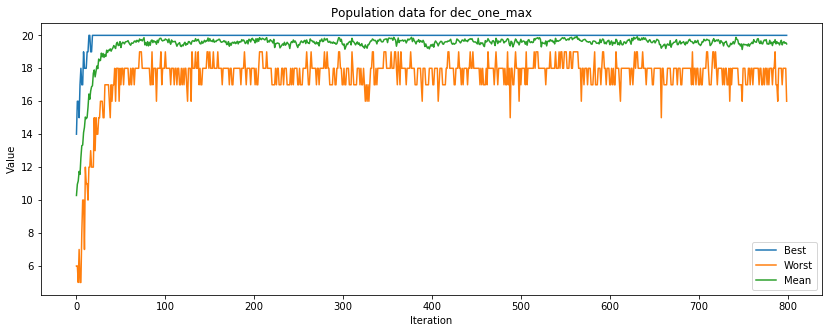

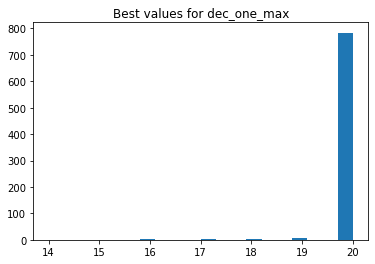

[20.]


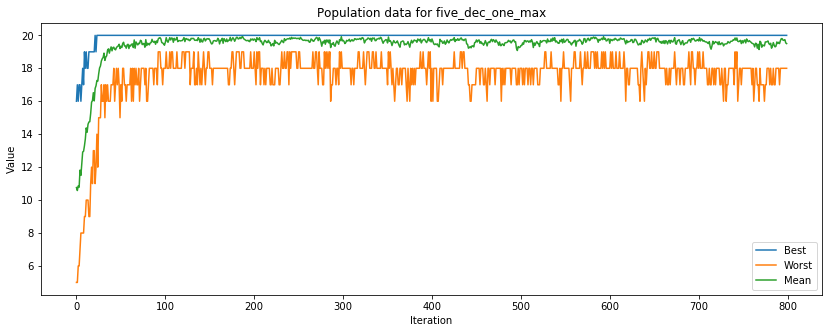

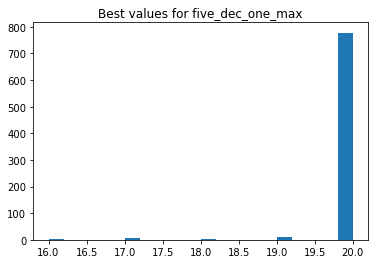

In [47]:
print("d = 20, N = 50, theta1 = 0.1, theta2 = 0.05, theta3 = 0.08")
d = 20

P = PBIL(800, 50, 0.1, 0.05, 0.08, one_max)
print(one_max([P[0]]))
plot_P("one_max")

P = PBIL(800, 50, 0.1, 0.05, 0.08, dec_one_max)
print(dec_one_max([P[0]]))
plot_P("dec_one_max")

P = PBIL(800, 50, 0.1, 0.05, 0.08, five_dec_one_max)
print(five_dec_one_max([P[0]]))
plot_P("five_dec_one_max")

### d = 30, N = 100, theta1 = 0.05, theta2 = 0.12, theta3 = 0.15

d = 30, N = 100, theta1 = 0.05, theta2 = 0.12, theta3 = 0.15
[30]


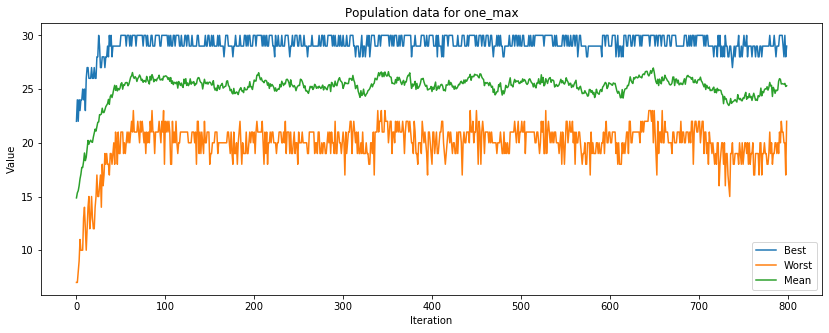

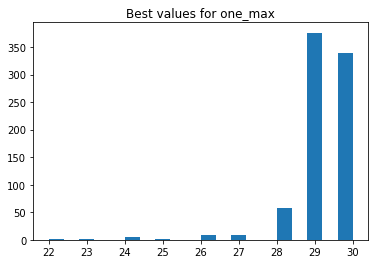

[30.]


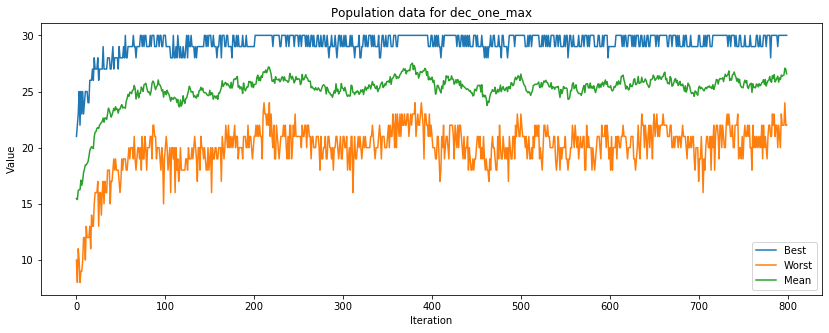

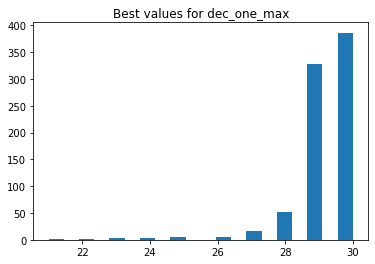

[33.]


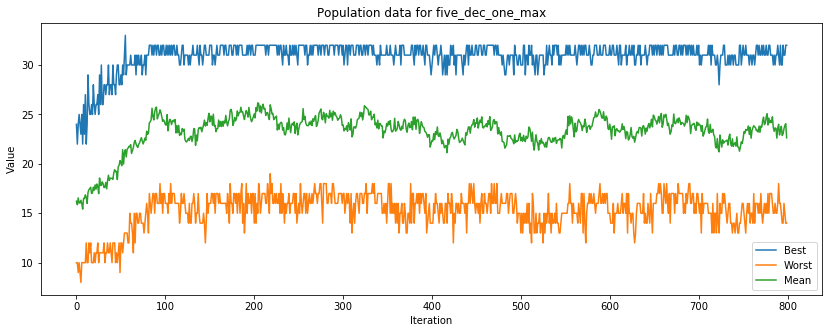

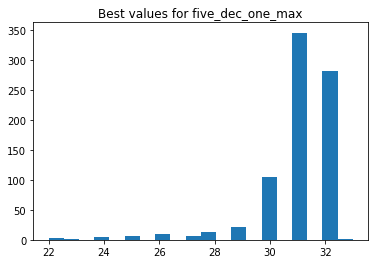

In [48]:
print("d = 30, N = 100, theta1 = 0.05, theta2 = 0.12, theta3 = 0.15")
d = 30

P = PBIL(800, 100, 0.05, 0.12, 0.15, one_max)
print(one_max([P[0]]))
plot_P("one_max")

P = PBIL(800, 100, 0.05, 0.12, 0.15, dec_one_max)
print(dec_one_max([P[0]]))
plot_P("dec_one_max")

P = PBIL(800, 100, 0.05, 0.12, 0.15, five_dec_one_max)
print(five_dec_one_max([P[0]]))
plot_P("five_dec_one_max")

### d = 30, N = 100, theta1 = 0.1, theta2 = 0.05, theta3 = 0.08

d = 30, N = 100, theta1 = 0.1, theta2 = 0.05, theta3 = 0.08
[30]


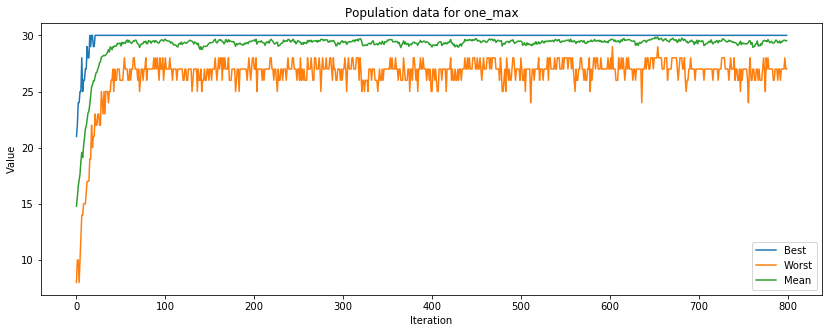

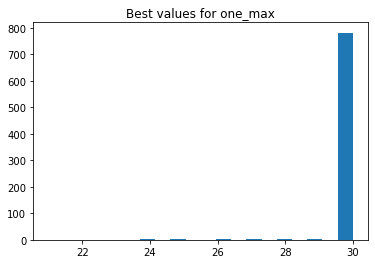

[30.]


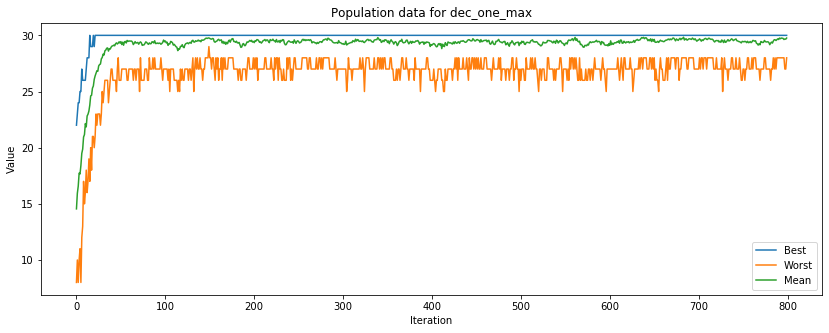

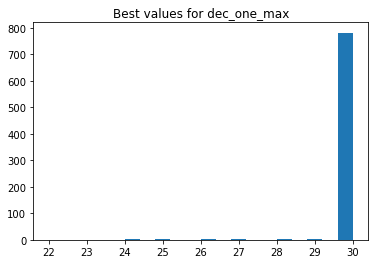

[32.]


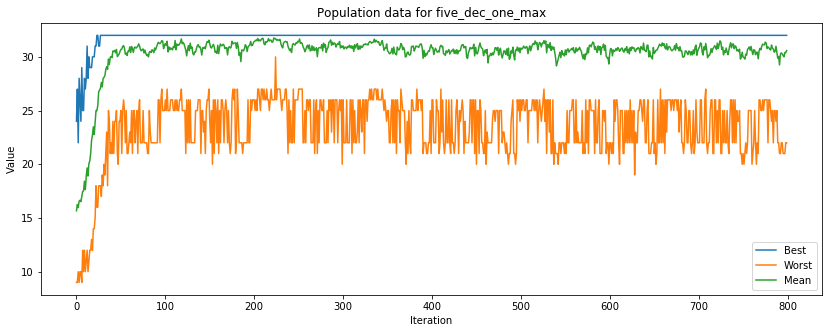

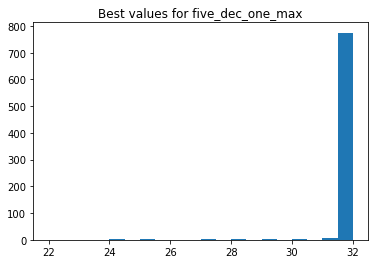

In [49]:
print("d = 30, N = 100, theta1 = 0.1, theta2 = 0.05, theta3 = 0.08")
d = 30

P = PBIL(800, 100, 0.1, 0.05, 0.08, one_max)
print(one_max([P[0]]))
plot_P("one_max")

P = PBIL(800, 100, 0.1, 0.05, 0.08, dec_one_max)
print(dec_one_max([P[0]]))
plot_P("dec_one_max")

P = PBIL(800, 100, 0.1, 0.05, 0.08, five_dec_one_max)
print(five_dec_one_max([P[0]]))
plot_P("five_dec_one_max")